In [3]:
import os
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math
import sys
import os
sys.path.append(os.path.abspath("../"))

#Get the ISO-Codes
iso = pd.read_csv("../Data/ISO/ISO.csv")

#Get the Functions
from Functions.pagerank import calculate_pagerank
from Functions.data_handling import load_network_dataframes, filter_dataframes_by_period 
from Functions.network_viz import visualize_network

# Load the network dataframes
csv_filenames = ['../Data/Networks/W_1_ij.csv', '../Data/Networks/W_2_ij.csv', '../Data/Networks/W_3_ij.csv']
W_ij_dataframes = load_network_dataframes(csv_filenames)


Loading W_ij Dataframes from CSV files...
Loaded ../Data/Networks/W_1_ij.csv as W_1_ij
Loaded ../Data/Networks/W_2_ij.csv as W_2_ij
Loaded ../Data/Networks/W_3_ij.csv as W_3_ij


In [4]:
# Define the desired start and end periods for filtering
start_period = 1989 
end_period = 2020  
W_ij_dataframes = filter_dataframes_by_period(W_ij_dataframes, start_period, end_period)


Filtering DataFrames for periods between 1989 and 2020...
Filtered W_1_ij. Original rows: 81353, Filtered rows: 69127
Filtered W_2_ij. Original rows: 34585, Filtered rows: 29382
Filtered W_3_ij. Original rows: 94775, Filtered rows: 78649


Saved trade_network_cap_1.png


KeyboardInterrupt: 

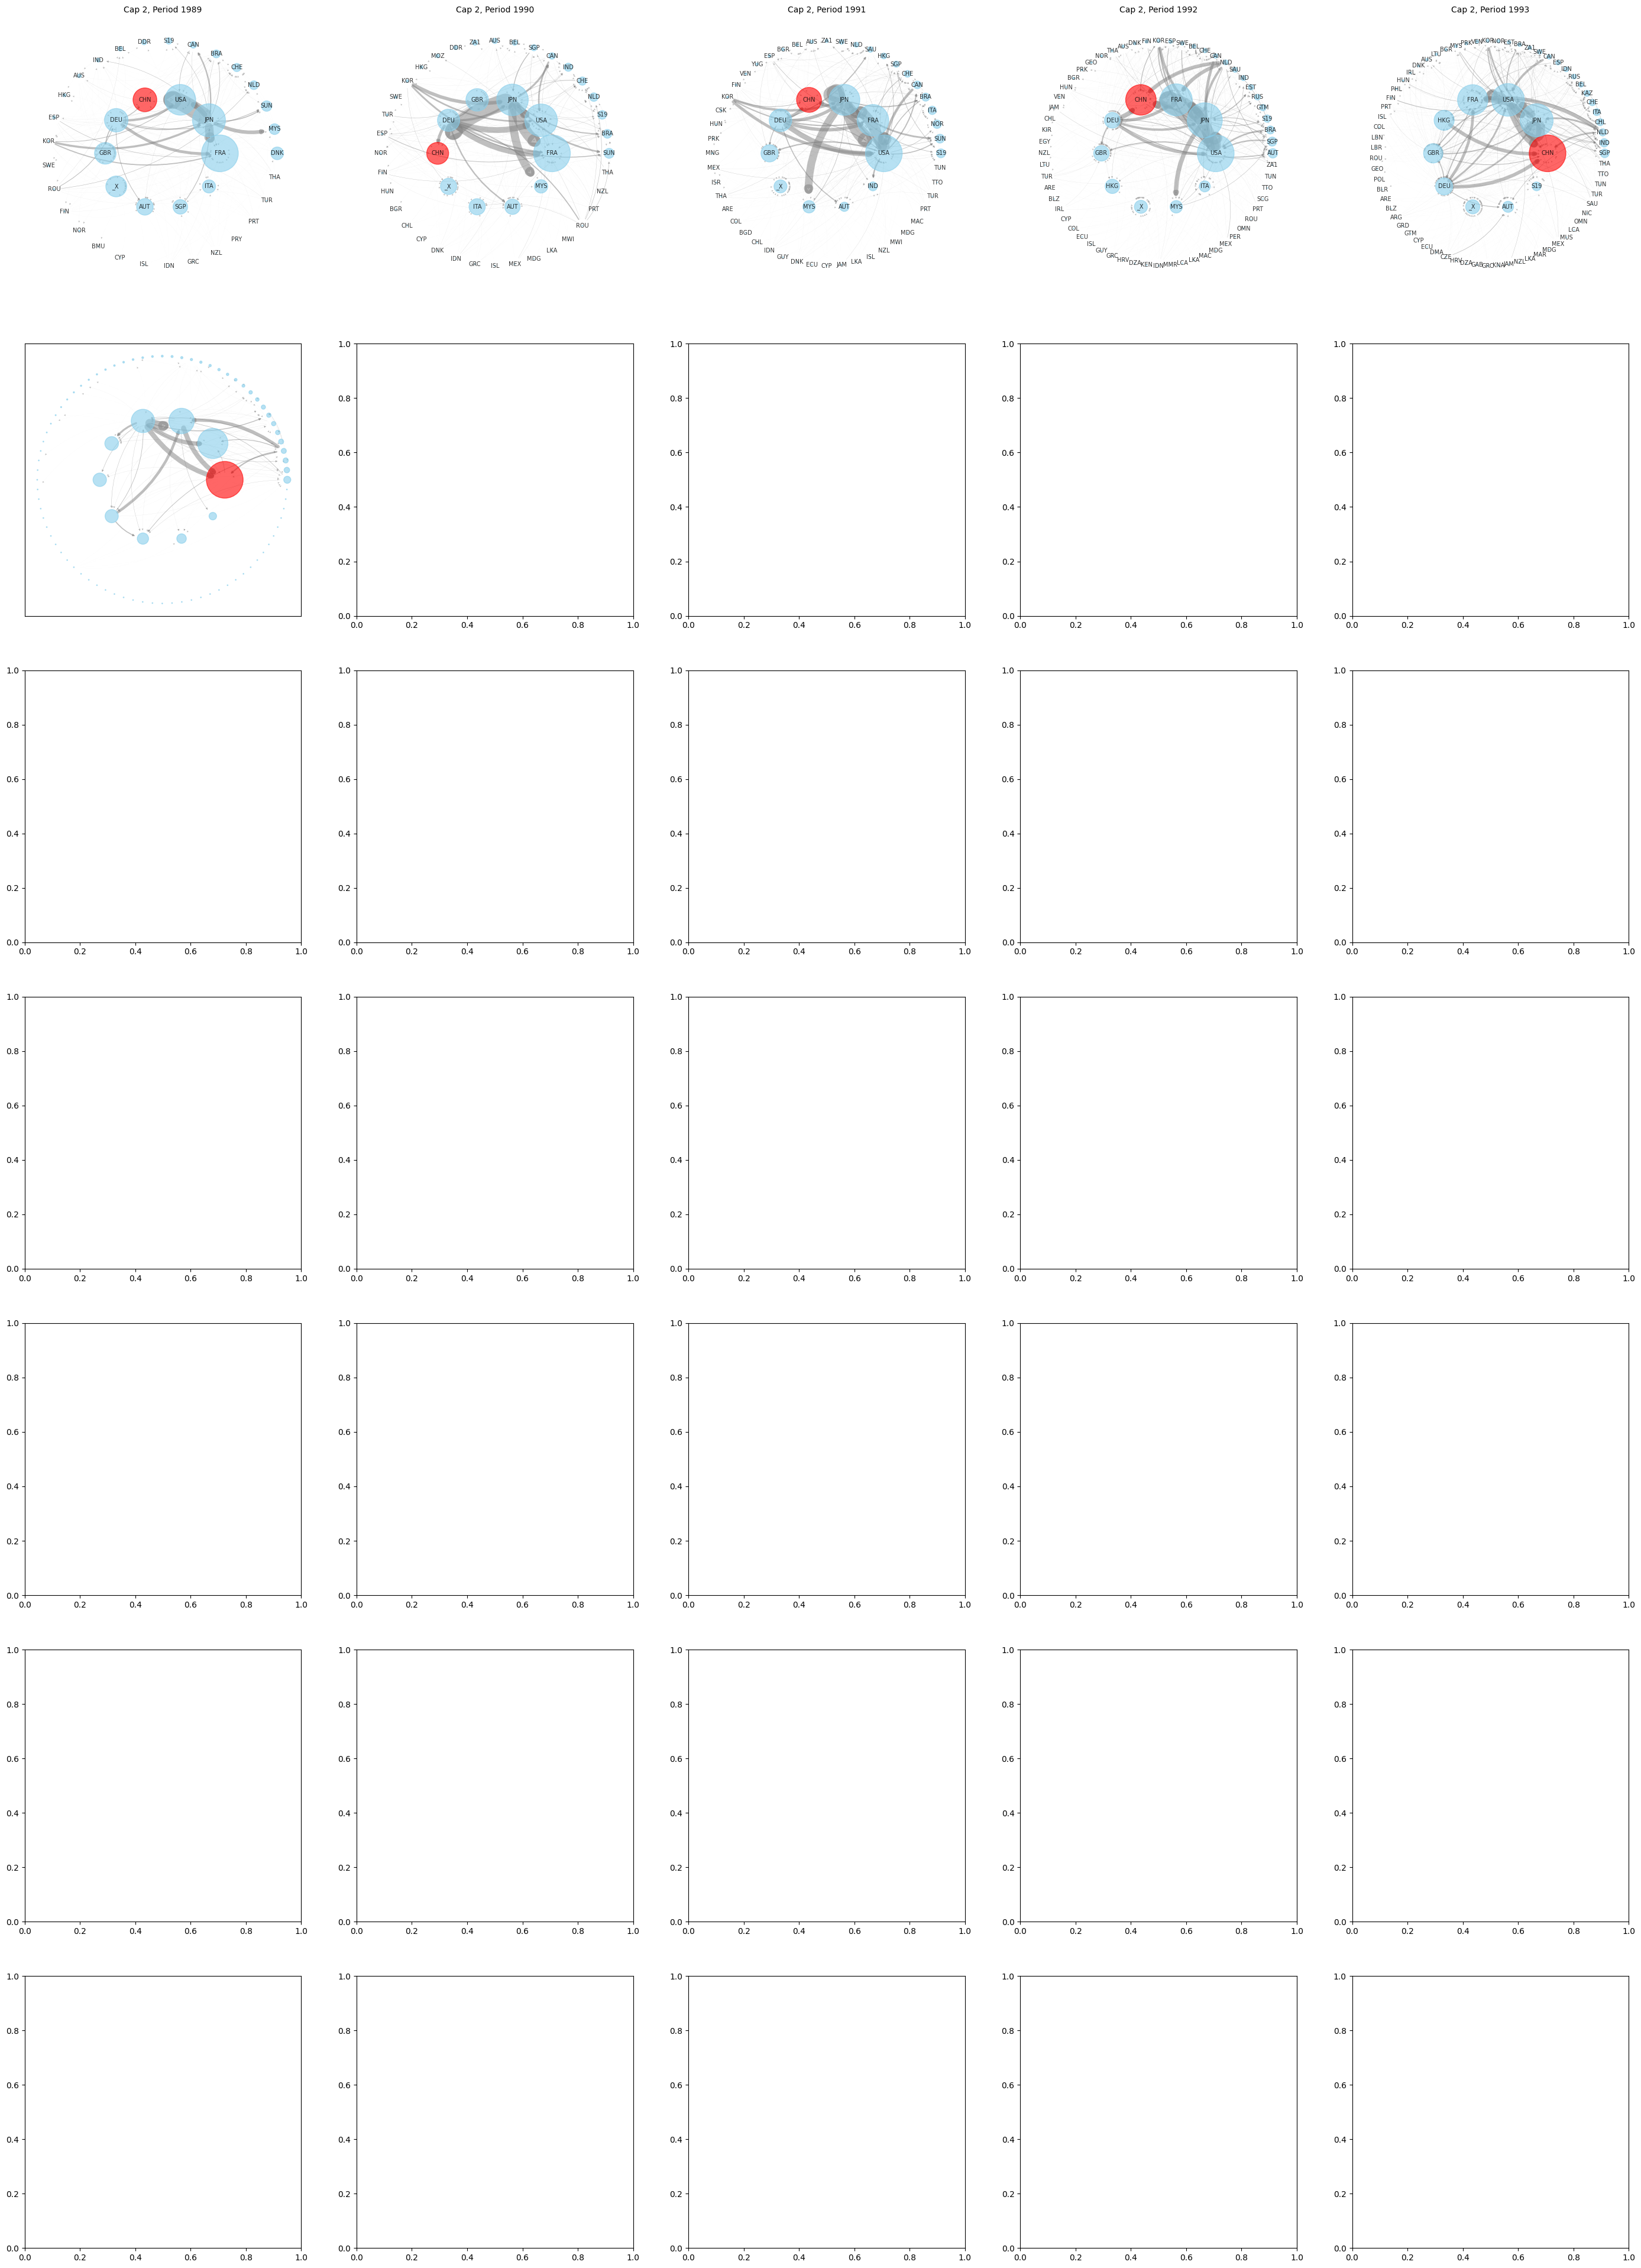

In [5]:
# Process each DataFrame
for df_name, df in W_ij_dataframes.items():
    cap = int(df_name.split('_')[1]) # Extract cap from df_name (e.g., 'W_1_ij' -> 1)
    
    unique_periods = df['period'].unique()
    num_periods = len(unique_periods)
    
    if num_periods == 0:
        print(f"No data for {df_name}. Skipping visualization.")
        continue

    # Determine grid size for subplots
    cols = 5  # Adjust this for more columns if needed, e.g., 3 or 4
    rows = (num_periods + cols - 1) // cols
    
    # Create a figure and a set of subplots
    # Adjust figsize based on the number of rows and columns to ensure readability
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 7, rows * 7))
    axes = axes.flatten() # Flatten in case of single row/column or multiple rows/cols

    for i, period in enumerate(unique_periods):
        ax = axes[i]
        TN_t_c_period = df[df['period'] == period].copy()
        
        pagerank_t_c = calculate_pagerank(TN_t_c_period)
        visualize_network(TN_t_c_period, pagerank_t_c, top_n=10, period_val=period, cap=cap, ax=ax)
    
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.suptitle(f'Trade Networks for Capability {cap} Across Periods', y=1.02, fontsize=16)
    plt.savefig(f'trade_network_cap_{cap}.png', bbox_inches='tight')
    plt.close(fig) # Close the figure to free memory
    print(f"Saved trade_network_cap_{cap}.png")